In [39]:
# pip install yfinance

In [40]:
import yfinance as yf

In [41]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 20,end.month,end.day) 
print(end,start)

2024-05-13 16:13:37.321851 2004-05-13 00:00:00


In [42]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [43]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [44]:
google_data.shape


(4966, 6)

In [45]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4.966000e+03
mean,43.791316,44.255288,43.351637,43.813430,43.813430,1.168242e+08
std,41.232031,41.697152,40.821583,41.269618,41.269618,1.502500e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.951268,13.111853,12.827109,12.969387,12.969387,2.784406e+07
50%,26.865750,27.031641,26.627969,26.859924,26.859924,5.771379e+07
75%,59.345124,59.847499,58.902512,59.380624,59.380624,1.448730e+08
max,175.990005,176.419998,171.399994,173.690002,173.690002,1.650833e+09


In [46]:
google_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4966 entries, 2004-08-19 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4966 non-null   float64
 1   High       4966 non-null   float64
 2   Low        4966 non-null   float64
 3   Close      4966 non-null   float64
 4   Adj Close  4966 non-null   float64
 5   Volume     4966 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 271.6 KB


In [47]:
google_data.isna().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [48]:
# pip install matplotlib

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price Graph of Google Data')

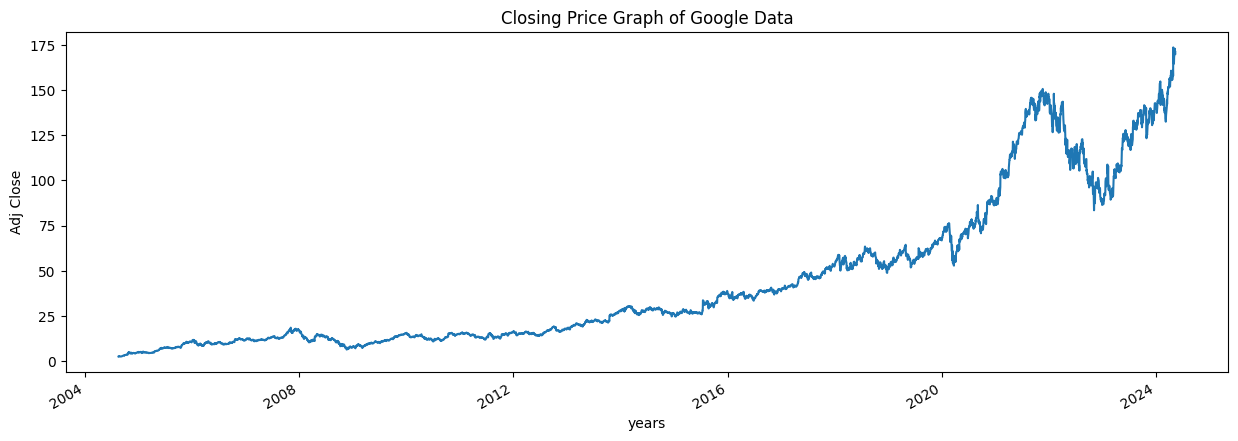

In [50]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel('years')
plt.ylabel('Adj Close')
plt.title("Closing Price Graph of Google Data")

In [51]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} Graph of Google Data")

In [52]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

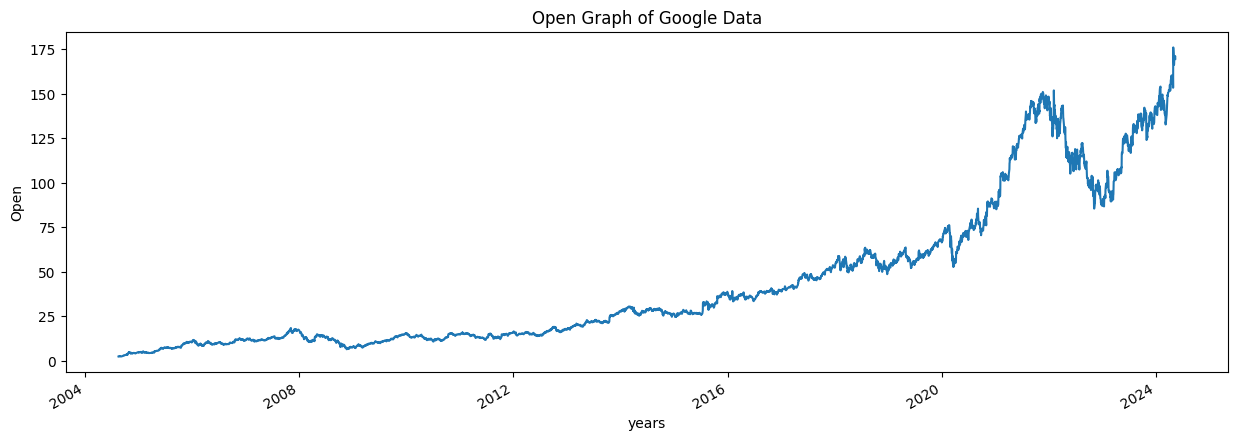

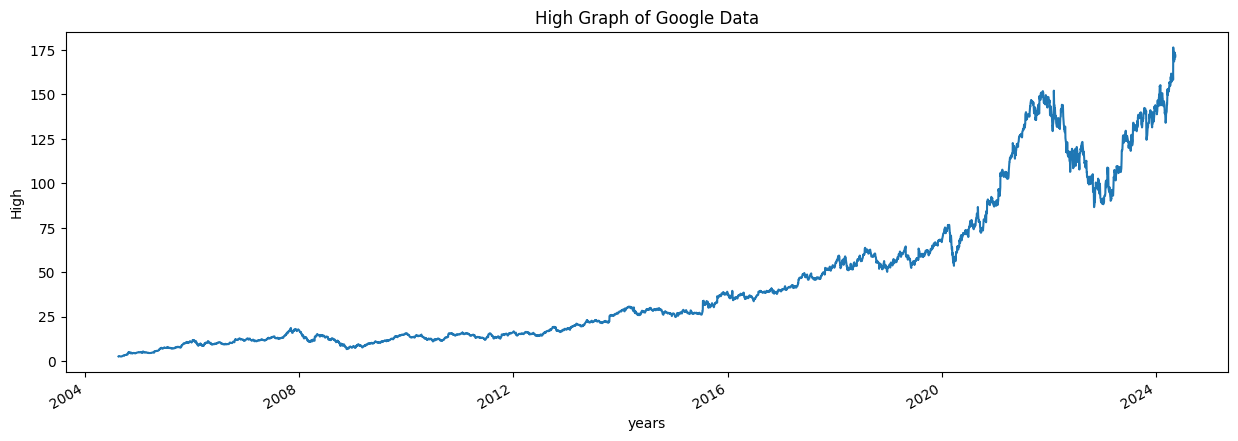

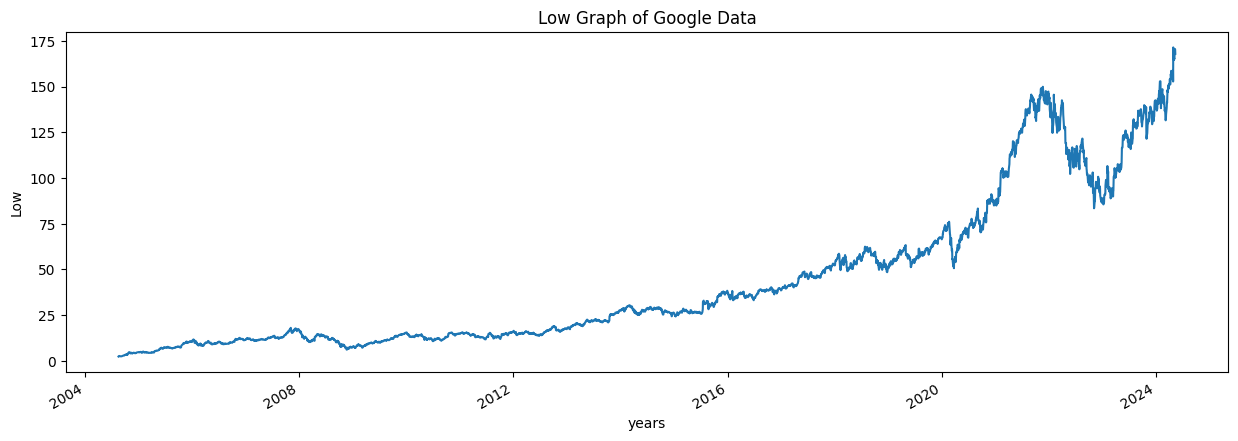

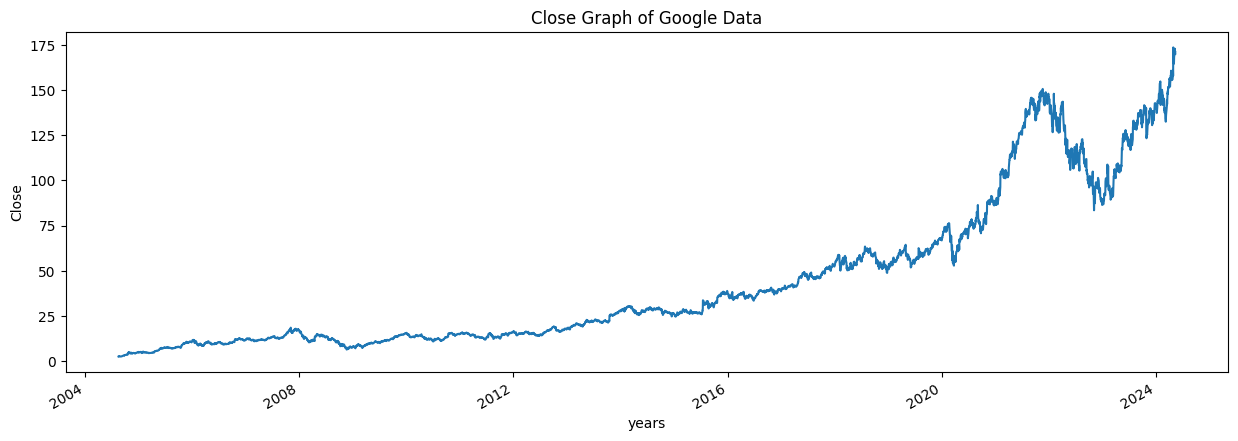

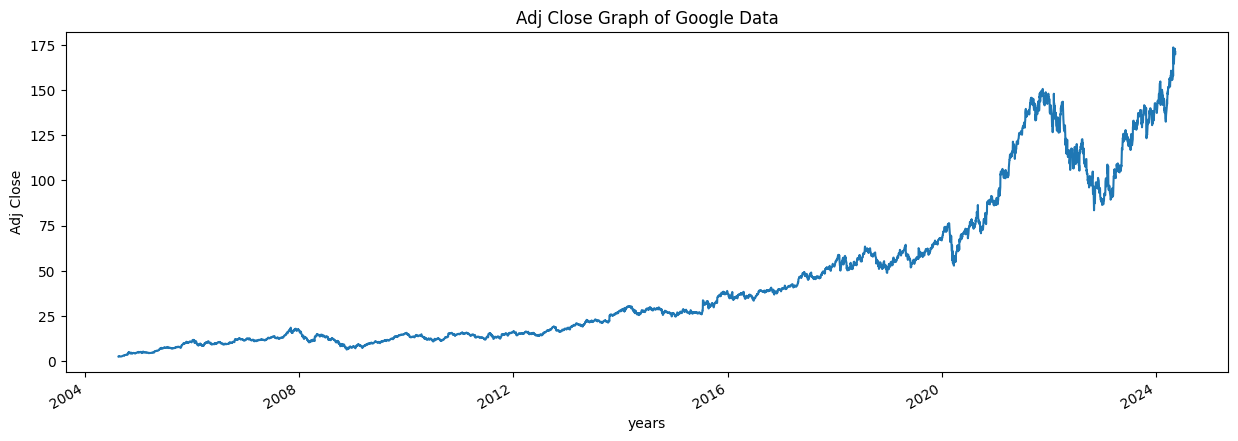

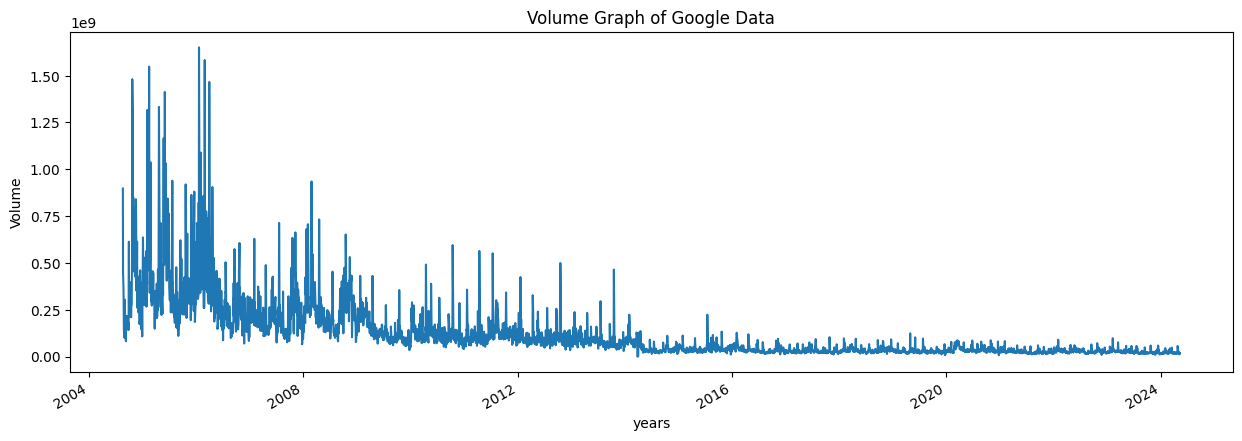

In [53]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [54]:
for i in range(2014,2024):
    print(i,list(google_data.index.year).count(i)) 
# We are counting number of days data is availale per year

2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [55]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [56]:
google_data['MA_for_250_days']

Date
2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
                ...    
2024-05-06    136.90476
2024-05-07    137.16492
2024-05-08    137.40044
2024-05-09    137.61916
2024-05-10    137.82864
Name: MA_for_250_days, Length: 4966, dtype: float64

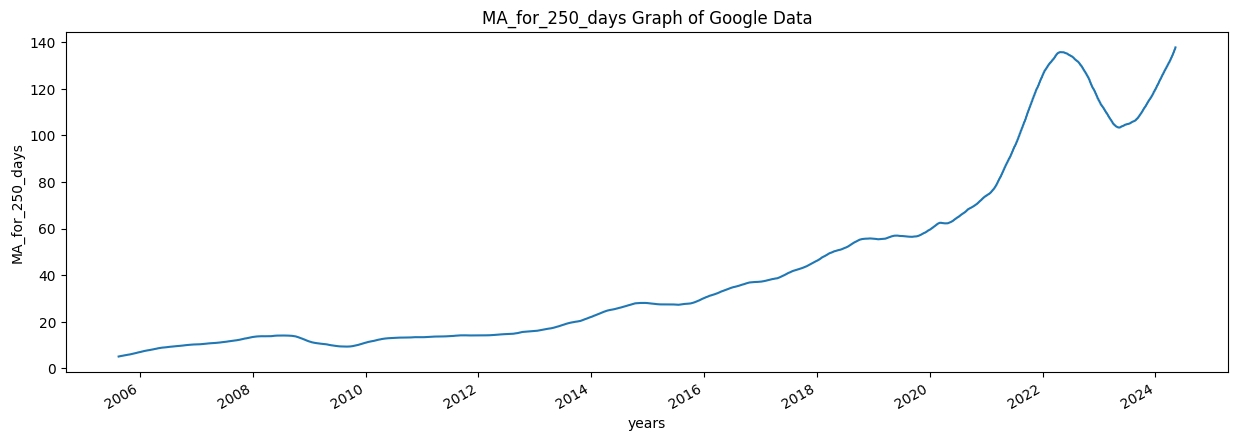

In [57]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

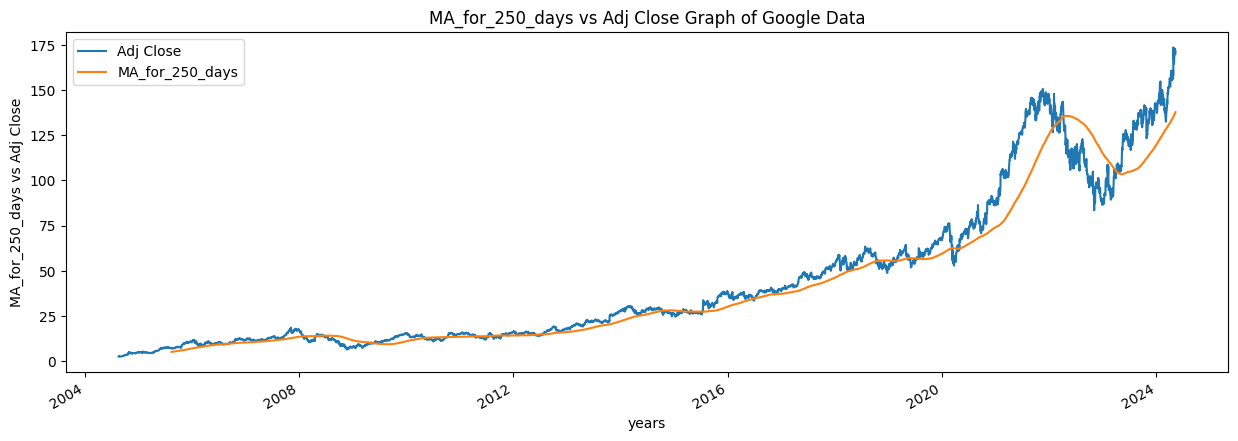

In [58]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days vs Adj Close')

In [59]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()

<Figure size 640x480 with 0 Axes>

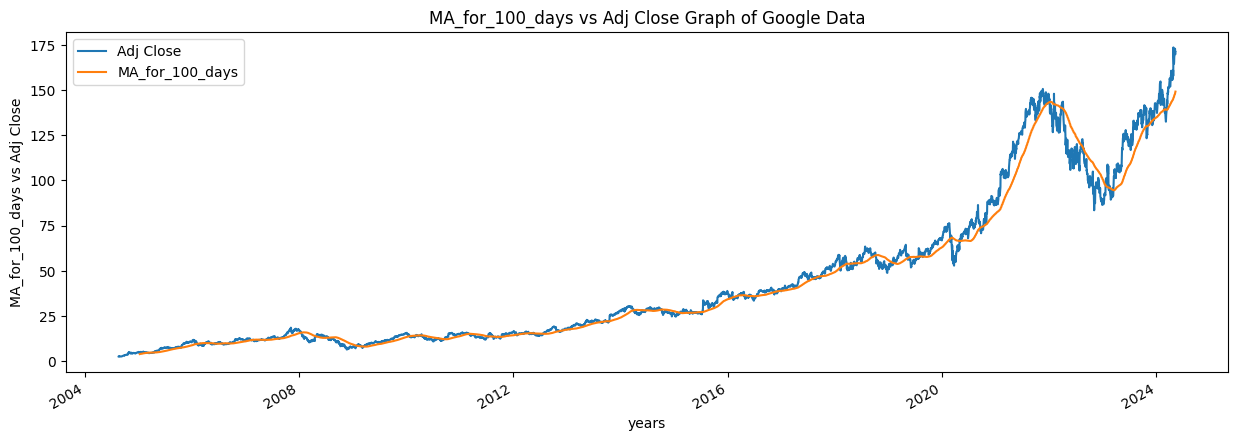

In [60]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days vs Adj Close')

<Figure size 640x480 with 0 Axes>

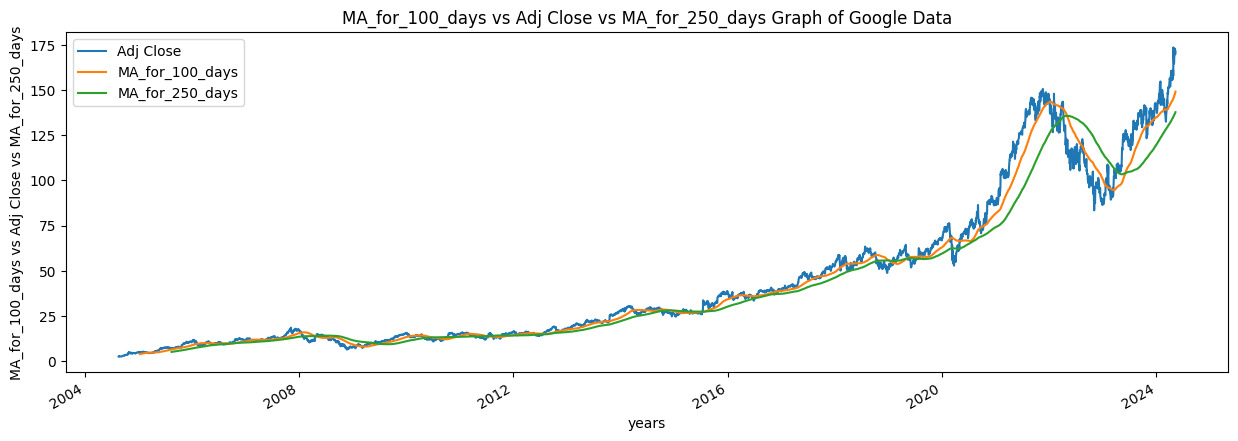

In [61]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA_for_100_days vs Adj Close vs MA_for_250_days')

In [62]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data['percentage_change_cp']

Date
2004-08-19         NaN
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
                ...   
2024-05-06    0.004971
2024-05-07    0.018548
2024-05-08   -0.010521
2024-05-09    0.002454
2024-05-10   -0.007518
Name: percentage_change_cp, Length: 4966, dtype: float64

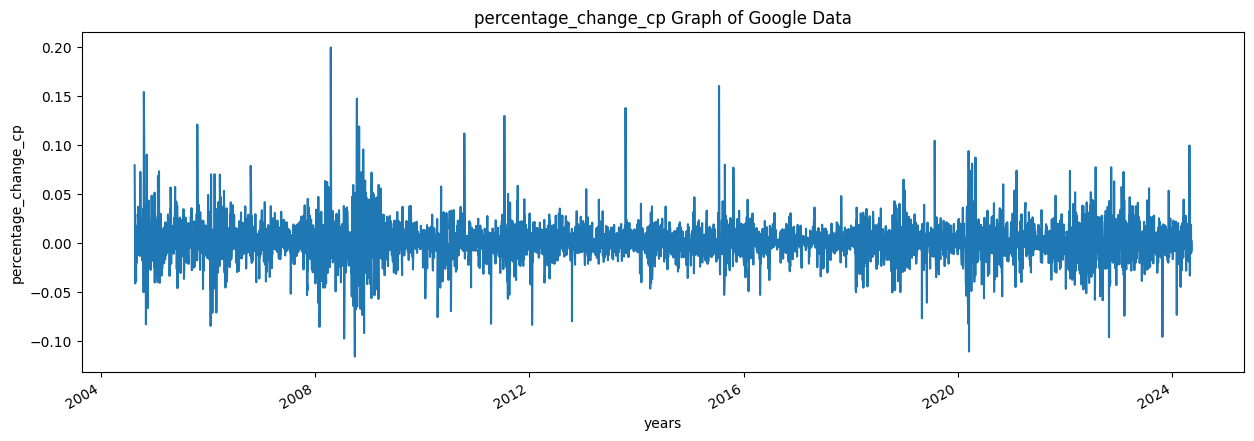

In [63]:
plot_graph((15,5),google_data['percentage_change_cp'],'percentage_change_cp')

In [64]:
Adj_close_price = google_data[['Adj Close']]

In [65]:
# Pre processsing Close price Data
# Narmalizing the Adj Close data.
# means converting the data into a range of 0 to 1. By doing this the model will get trained faster


In [66]:
max(Adj_close_price.values), min(Adj_close_price.values)


(array([173.69000244]), array([2.49091291]))

In [67]:
# pip install scikit-learn

In [68]:
from sklearn.preprocessing import  MinMaxScaler
scaler  = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[4.80154176e-05],
       [1.20751854e-03],
       [1.36609420e-03],
       ...,
       [9.85221891e-01],
       [9.87675165e-01],
       [9.80140028e-01]])

In [69]:
len(scaled_data)

4966

In [70]:
x_data = []
y_data = []
 # Starting 99 values will be null 
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
import numpy as np
x_data,y_data = np.array(x_data),np.array(y_data)

In [71]:
x_data[0],y_data[0]

(array([[4.80154176e-05],
        [1.20751854e-03],
        [1.36609420e-03],
        [7.07054110e-04],
        [8.71448216e-04],
        [1.14932293e-03],
        [8.93270874e-04],
        [2.90971091e-04],
        [3.43344077e-04],
        [3.49190376e-05],
        [2.18226577e-04],
        [0.00000000e+00],
        [2.28412341e-04],
        [3.33162491e-04],
        [3.34616406e-04],
        [7.73975999e-04],
        [1.08967340e-03],
        [1.67015610e-03],
        [1.74435035e-03],
        [2.03095134e-03],
        [2.54305683e-03],
        [2.81510892e-03],
        [2.59397451e-03],
        [2.67253190e-03],
        [3.02751705e-03],
        [2.88348612e-03],
        [2.65507935e-03],
        [3.90623624e-03],
        [4.52017709e-03],
        [4.30485974e-03],
        [4.73840228e-03],
        [5.09919752e-03],
        [5.58074851e-03],
        [5.39307783e-03],
        [5.65057962e-03],
        [5.48764082e-03],
        [5.12829811e-03],
        [5.43963237e-03],
        [5.9

In [72]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]



In [73]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3406, 100, 1)
(3406, 1)
(1460, 100, 1)
(1460, 1)


In [74]:
# pip install tensorflow

In [75]:
# pip install keras

In [76]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [81]:
model = Sequential()
model.add(LSTM(128,return_sequences = True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [82]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [83]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 217s 61ms/step - loss: 2.7650e-04
Epoch 2/2
3406/3406 ━━━━━━━━━━━━━━━━━━━━ 237s 69ms/step - loss: 5.0784e-05


In [84]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [85]:
predictions=model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step


In [86]:
predictions

array([[0.34474373],
       [0.35359913],
       [0.36151764],
       ...,
       [1.0359375 ],
       [1.0364456 ],
       [1.0358049 ]], dtype=float32)

In [87]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 61.510723],
       [ 63.02676 ],
       [ 64.3824  ],
       ...,
       [179.84248 ],
       [179.92947 ],
       [179.81978 ]], dtype=float32)

In [88]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 62.40399933],
       [ 63.18500137],
       [ 63.41650009],
       ...,
       [171.16000366],
       [171.58000183],
       [170.28999329]])

In [89]:
rmse= np.sqrt(np.mean((inv_predictions-inv_y_test)**2))
rmse

5.009089719216443

In [91]:
import pandas as pd
ploting_data = pd.DataFrame({
    'original_test_data':inv_y_test.reshape(-1),
    'predictions':inv_predictions.reshape(-1),
},index = google_data.index[splitting_len+100:])
ploting_data.head()

,original_test_data,predictions
Date,,
2018-07-24,62.403999,61.510723
2018-07-25,63.185001,63.026760
2018-07-26,63.416500,64.382401
2018-07-27,61.924999,65.101006
2018-07-30,60.987000,64.482140


<Figure size 640x480 with 0 Axes>

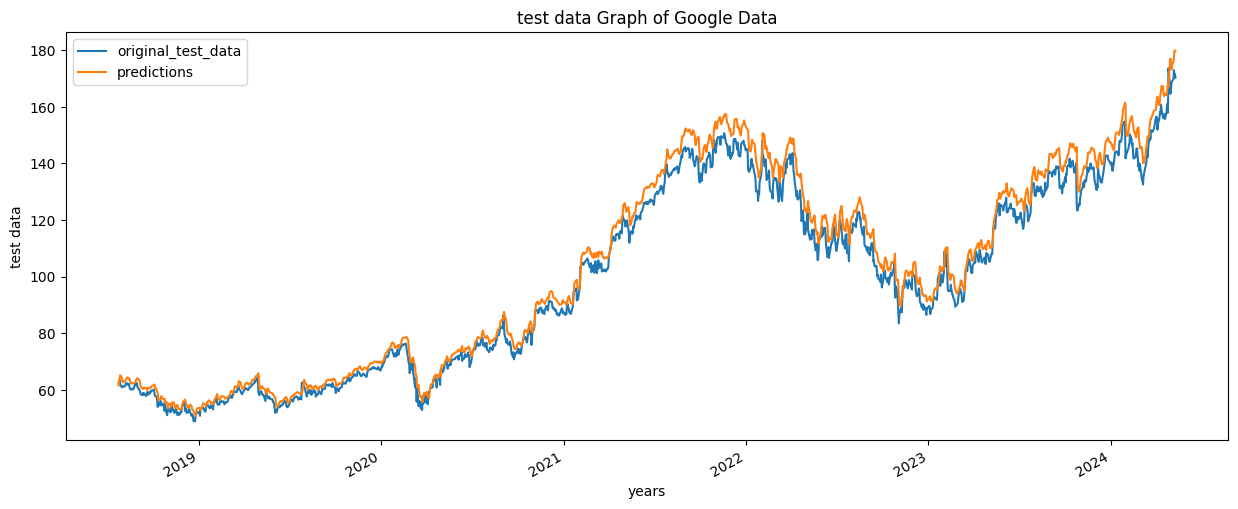

In [92]:
plot_graph((15,6),ploting_data,'test data')

<Figure size 640x480 with 0 Axes>

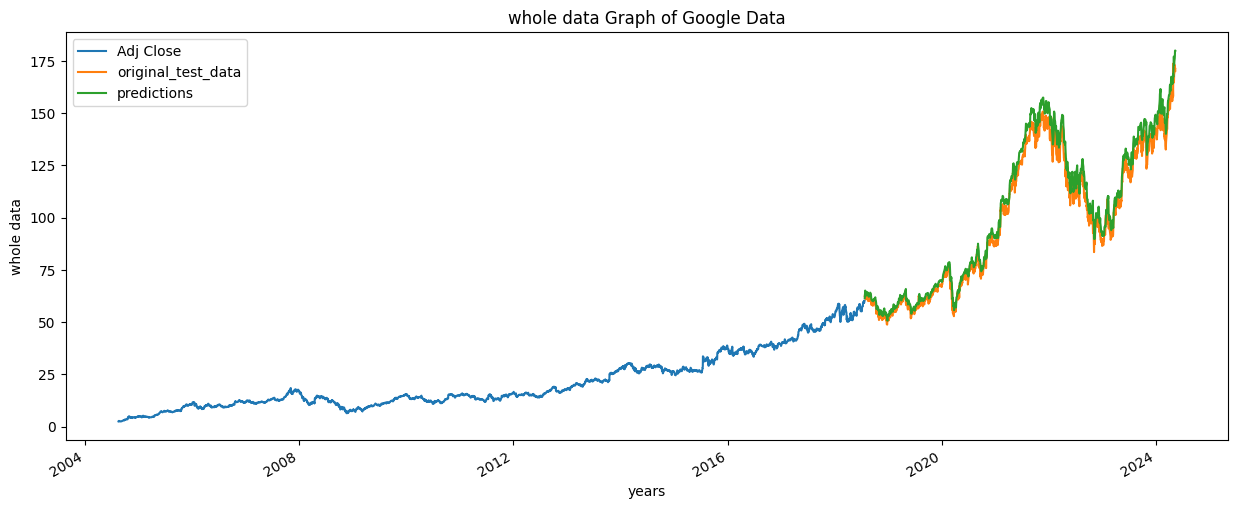

In [93]:
plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis=0),'whole data')

In [94]:
model.save('Latest_stock_price_model.keras')